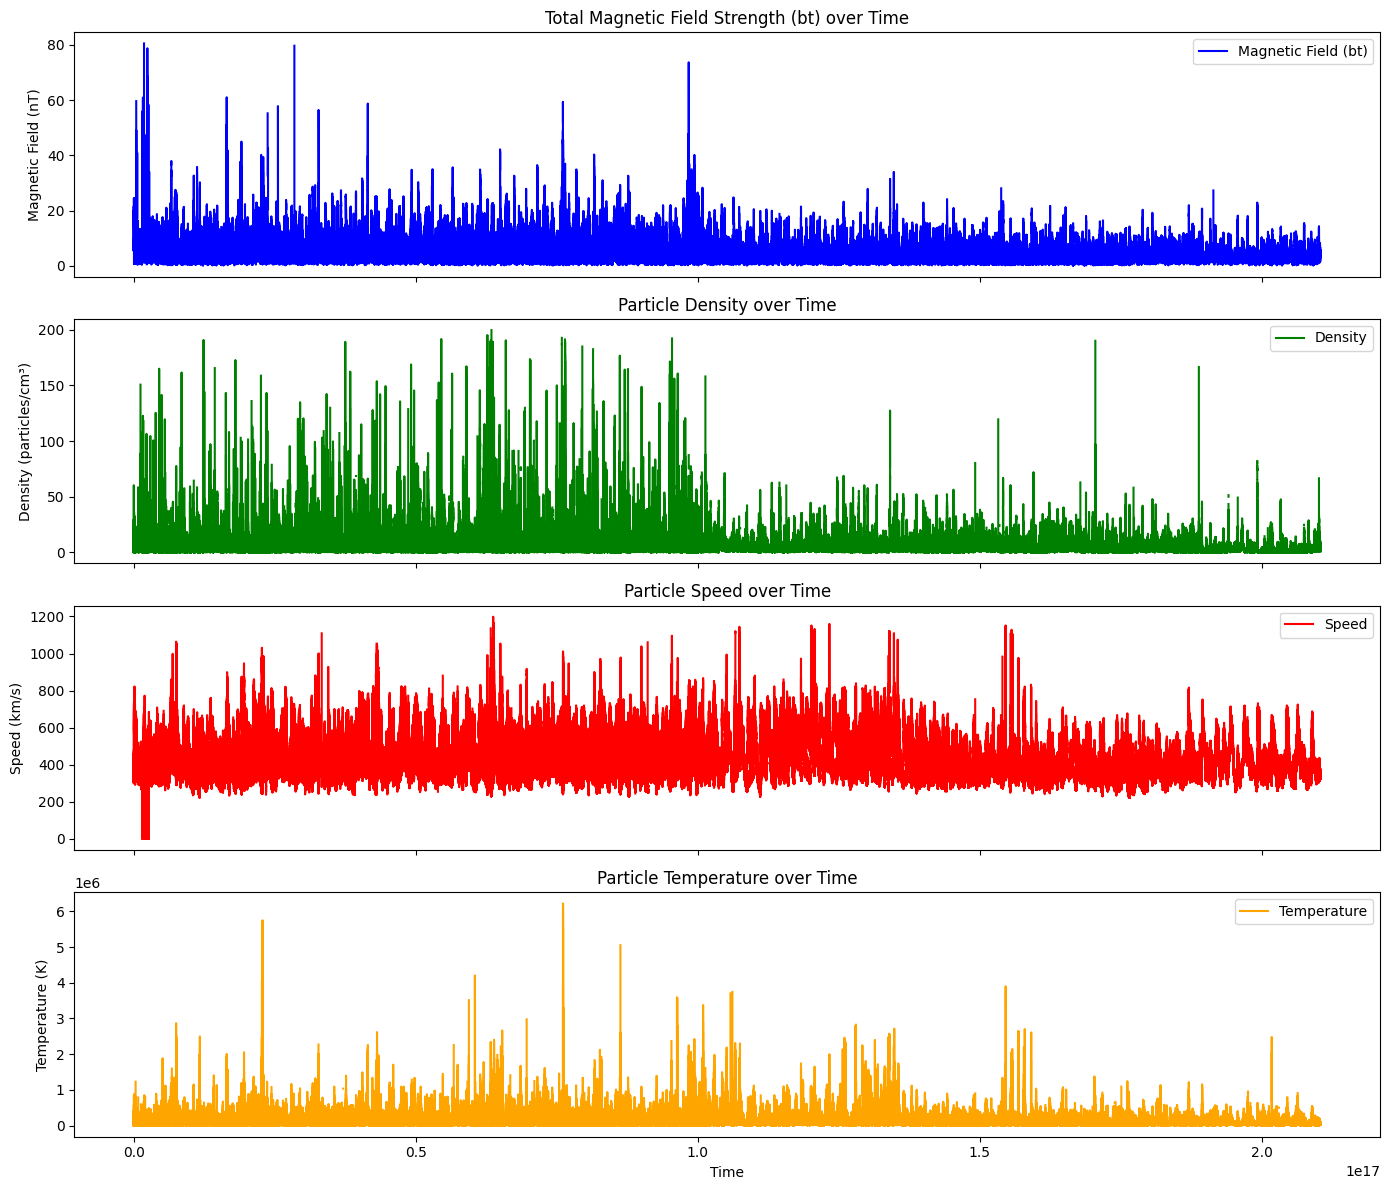

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
solar_flare_data = pd.read_csv('C:\\Users\\shahi\\OneDrive\\Desktop\\Fatema_NASA\\solar_wind.csv')

# Convert the 'timedelta' to a more usable format (if needed)
solar_flare_data['timedelta'] = pd.to_timedelta(solar_flare_data['timedelta'])

# Plotting the time series of 'bt', 'density', 'speed', and 'temperature'
fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Plot bt
axs[0].plot(solar_flare_data['timedelta'], solar_flare_data['bt'], label='Magnetic Field (bt)', color='blue')
axs[0].set_ylabel('Magnetic Field (nT)')
axs[0].set_title('Total Magnetic Field Strength (bt) over Time')
axs[0].legend(loc='upper right')

# Plot density
axs[1].plot(solar_flare_data['timedelta'], solar_flare_data['density'], label='Density', color='green')
axs[1].set_ylabel('Density (particles/cm³)')
axs[1].set_title('Particle Density over Time')
axs[1].legend(loc='upper right')

# Plot speed
axs[2].plot(solar_flare_data['timedelta'], solar_flare_data['speed'], label='Speed', color='red')
axs[2].set_ylabel('Speed (km/s)')
axs[2].set_title('Particle Speed over Time')
axs[2].legend(loc='upper right')

# Plot temperature
axs[3].plot(solar_flare_data['timedelta'], solar_flare_data['temperature'], label='Temperature', color='orange')
axs[3].set_ylabel('Temperature (K)')
axs[3].set_xlabel('Time')
axs[3].set_title('Particle Temperature over Time')
axs[3].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [1]:
pip install tensorflow


  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadat

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [13]:
import pandas as pd

# Identify non-numeric columns
non_numeric_cols = solar_flare_data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['period', 'source'], dtype='object')


In [15]:
import numpy as np
import pandas as pd

# Identify numeric columns
numeric_cols = solar_flare_data.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['timedelta', 'bx_gse', 'by_gse', 'bz_gse', 'theta_gse', 'phi_gse',
       'bx_gsm', 'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'bt', 'density',
       'speed', 'temperature'],
      dtype='object')


In [16]:
# Fill NaN values in numeric columns with their mean
solar_flare_data[numeric_cols] = solar_flare_data[numeric_cols].fillna(solar_flare_data[numeric_cols].mean())


In [17]:
# Check for remaining missing values
missing_values = solar_flare_data[numeric_cols].isna().sum()
print("Remaining missing values in numeric columns:\n", missing_values)


Remaining missing values in numeric columns:
 timedelta      0
bx_gse         0
by_gse         0
bz_gse         0
theta_gse      0
phi_gse        0
bx_gsm         0
by_gsm         0
bz_gsm         0
theta_gsm      0
phi_gsm        0
bt             0
density        0
speed          0
temperature    0
dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of columns to scale
numeric_cols_to_scale = numeric_cols.difference(['timedelta'])

# Scale the numeric columns (excluding 'timedelta')
solar_flare_data[numeric_cols_to_scale] = scaler.fit_transform(solar_flare_data[numeric_cols_to_scale])


In [21]:
# Convert Index to list and append the new column
numeric_cols_list = numeric_cols.tolist()
numeric_cols_list.append('timedelta_seconds')

# Convert back to Index
numeric_cols = pd.Index(numeric_cols_list)



In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of columns to scale
numeric_cols_to_scale = numeric_cols.difference(['timedelta'])

# Scale the numeric columns (excluding 'timedelta')
solar_flare_data[numeric_cols_to_scale] = scaler.fit_transform(solar_flare_data[numeric_cols_to_scale])


In [23]:
# Check the first few rows of the scaled data
print(solar_flare_data.head())


    period    bx_gse    by_gse    bz_gse  theta_gse   phi_gse    bx_gsm  \
0  train_a -0.333905  2.071135 -0.397792  -0.444129 -1.774488 -0.333905   
1  train_a -0.357296  2.152725 -0.464507  -0.539444 -1.840201 -0.357296   
2  train_a -0.022018  2.407695 -0.731365  -0.754144 -2.104402 -0.022018   
3  train_a -0.061004  2.417893 -0.873134  -0.917816 -2.098551 -0.061004   
4  train_a  0.001373  2.417893 -1.031581  -1.067047 -2.118805  0.001373   

     by_gsm    bz_gsm  theta_gsm   phi_gsm        bt   density     speed  \
0  2.071135 -0.397792  -0.444129 -1.774488  0.139609 -1.315972  0.322035   
1  2.152725 -0.464507  -0.539444 -1.840201  0.173061 -1.250977  0.211373   
2  2.407695 -0.731365  -0.754144 -2.104402  0.106157 -1.137235  0.591678   
3  2.417893 -0.873134  -0.917816 -2.098551  0.072705 -1.137235  0.591678   
4  2.417893 -1.031581  -1.067047 -2.118805 -0.027651 -1.218479  0.339700   

   temperature source  timedelta_seconds  
0     2.854672     ac          -1.731009  
1     

In [24]:
# Drop non-numeric columns
solar_flare_data.drop(columns=['period', 'source'], inplace=True)


In [25]:
# List remaining numeric columns
numeric_cols = solar_flare_data.columns
print("Numeric Columns:", numeric_cols)


Numeric Columns: Index(['bx_gse', 'by_gse', 'bz_gse', 'theta_gse', 'phi_gse', 'bx_gsm',
       'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'bt', 'density', 'speed',
       'temperature', 'timedelta_seconds'],
      dtype='object')


In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(solar_flare_data)

# Create a DataFrame with the scaled data
scaled_solar_flare_data = pd.DataFrame(scaled_data, columns=numeric_cols)

# Optionally, reset the index if needed
scaled_solar_flare_data.reset_index(drop=True, inplace=True)

print(scaled_solar_flare_data.head())


     bx_gse    by_gse    bz_gse  theta_gse   phi_gse    bx_gsm    by_gsm  \
0 -0.333905  2.071135 -0.397792  -0.444129 -1.774488 -0.333905  2.071135   
1 -0.357296  2.152725 -0.464507  -0.539444 -1.840201 -0.357296  2.152725   
2 -0.022018  2.407695 -0.731365  -0.754144 -2.104402 -0.022018  2.407695   
3 -0.061004  2.417893 -0.873134  -0.917816 -2.098551 -0.061004  2.417893   
4  0.001373  2.417893 -1.031581  -1.067047 -2.118805  0.001373  2.417893   

     bz_gsm  theta_gsm   phi_gsm        bt   density     speed  temperature  \
0 -0.397792  -0.444129 -1.774488  0.139609 -1.315972  0.322035     2.854672   
1 -0.464507  -0.539444 -1.840201  0.173061 -1.250977  0.211373     3.511570   
2 -0.731365  -0.754144 -2.104402  0.106157 -1.137235  0.591678     1.516077   
3 -0.873134  -0.917816 -2.098551  0.072705 -1.137235  0.591678     1.516077   
4 -1.031581  -1.067047 -2.118805 -0.027651 -1.218479  0.339700     2.082716   

   timedelta_seconds  
0          -1.731009  
1          -1.728925  

In [27]:
# Assuming you want to create sequences of length 10
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
sequences = create_sequences(scaled_solar_flare_data.values, seq_length)


In [28]:
from sklearn.model_selection import train_test_split

X = sequences[:, :-1]  # Features (all columns except the last one)
y = sequences[:, -1, -1]  # Target (last column of each sequence)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.8492 - val_loss: 0.1210
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1110 - val_loss: 0.0349
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0302 - val_loss: 0.0116
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - val_loss: 0.0059
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 0.0013

In [30]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4884e-04 
Test Loss: 0.00035182040301151574


In [31]:
predictions = model.predict(X_test)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


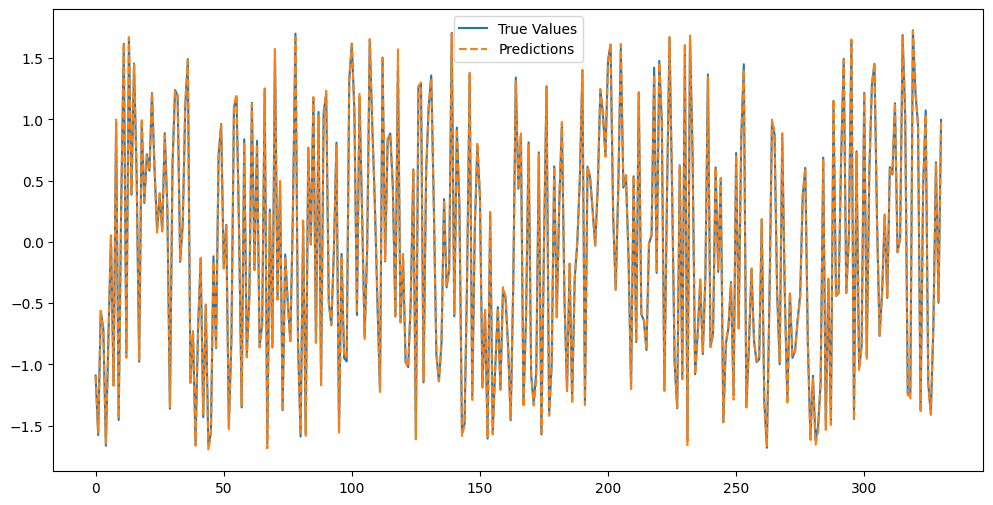

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions', linestyle='--')
plt.legend()
plt.show()


In [33]:
model.save('lstm_model.h5')


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Absolute Error: 0.013095661981934474
Root Mean Squared Error: 0.018756878162705146


C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


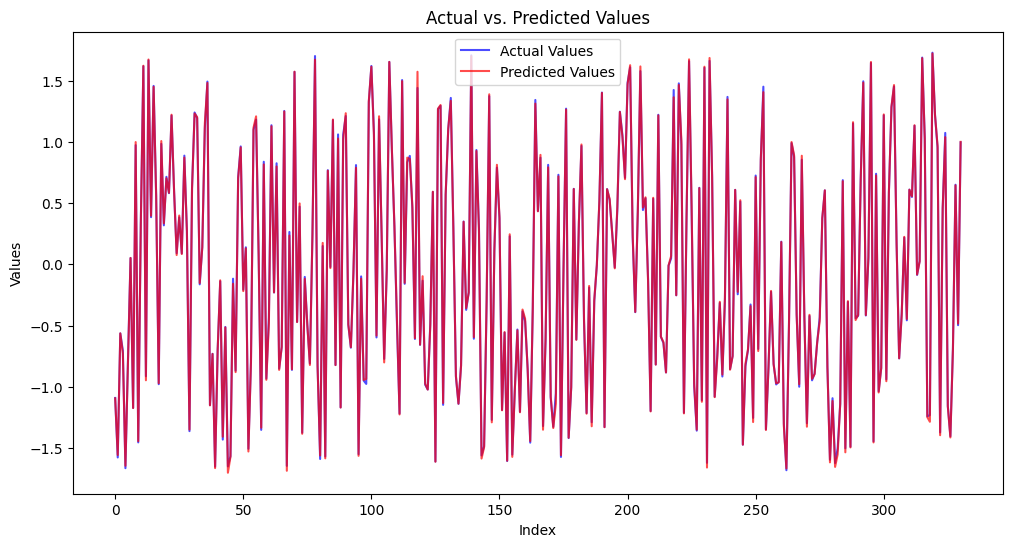

In [40]:
import matplotlib.pyplot as plt

# Assuming y_test and predictions are numpy arrays
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test, label='Actual Values', color='blue', alpha=0.7)

# Plot predicted values
plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [41]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Assuming y_test and predictions are your actual and predicted values
mape = mean_absolute_percentage_error(y_test, predictions) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 2.94%
